# All improts necessary

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import sys
sys.path.append('..')

In [3]:
import pandas as pd
import numpy as np

In [4]:
from sklearn.impute import SimpleImputer

In [5]:
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler

In [6]:
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import QuantileTransformer

In [7]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

In [8]:
from sklearn.pipeline import Pipeline

In [9]:
from sklearn.compose import ColumnTransformer

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
from sklearn.model_selection import cross_val_score

In [80]:
from sklearn.model_selection import GridSearchCV

In [12]:
from sklearn.linear_model import LogisticRegression

In [13]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.under_sampling import ClusterCentroids
from imblearn.under_sampling import NearMiss

In [14]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
from source.code.estimators.customclassifier import CustomClassifier

In [17]:
from source.code.transformers.customlabelencoder import CustomLabelEncoder

In [18]:
from source.code.transformers.customlabelbinarizer import CustomLabelBinarizer

In [19]:
import matplotlib.pyplot as plt

In [20]:
from sklearn.metrics import auc

In [21]:
from sklearn.metrics import roc_curve

In [22]:
%matplotlib inline

sns.set(font_scale=2)

# Read the data and add some gaps

In [25]:
data = pd.read_csv('../data/datasets/TS_Summer_2018/data.csv', sep=';')

In [26]:
data.head().T

,0,1,2,3,4
age,56,57,37,40,56
job,housemaid,services,services,admin.,services
marital,married,married,married,married,married
education,basic.4y,high.school,high.school,basic.6y,high.school
default,no,unknown,no,no,no
housing,no,no,yes,no,no
loan,no,no,no,no,yes
contact,telephone,telephone,telephone,telephone,telephone
month,may,may,may,may,may
day_of_week,mon,mon,mon,mon,mon


In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
y                 41188 non-null object
dtypes: float64(5), int64(5), object(11)
memory usa

In [28]:
columns_with_gaps = data.columns[:-1]

In [29]:
minimum = 0
maximum = 0.3

In [30]:
columns_with_gaps_dict = dict(
    zip(
        columns_with_gaps,
        np.random.uniform(
            minimum,
            maximum,
            len(columns_with_gaps)
        )
    )
)

In [31]:
columns_with_gaps_dict

{'age': 0.0063611639781670165,
 'job': 0.1398097772540567,
 'marital': 0.013406193506819897,
 'education': 0.257202207333657,
 'default': 0.06412208775909274,
 'housing': 0.2887141650184498,
 'loan': 0.06304523069475025,
 'contact': 0.10873398611985267,
 'month': 0.22781111146003546,
 'day_of_week': 0.22622635449512812,
 'duration': 0.22211210713803045,
 'campaign': 0.025021256189695605,
 'pdays': 0.24755628872063887,
 'previous': 0.010539496138136572,
 'poutcome': 0.0009351962586969908,
 'emp.var.rate': 0.10057623150518218,
 'cons.price.idx': 0.2619327075700458,
 'cons.conf.idx': 0.1019295797854629,
 'euribor3m': 0.03085914081745885,
 'nr.employed': 0.2849212608842214}

In [32]:
data_with_gaps = data.copy()

In [33]:
for column in columns_with_gaps:
    if columns_with_gaps_dict[column] > 0:
        gaps_count = int(
            len(data_with_gaps) * columns_with_gaps_dict[column]
        )
        data_with_gaps[column].iloc[
            np.random.randint(
                0,
                len(data_with_gaps),
                gaps_count
            )
        ] = np.nan

In [34]:
data_with_gaps.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               40927 non-null float64
job               35824 non-null object
marital           40640 non-null object
education         31843 non-null object
default           38631 non-null object
housing           30840 non-null object
loan              38665 non-null object
contact           36926 non-null object
month             32798 non-null object
day_of_week       32836 non-null object
duration          32990 non-null float64
campaign          40171 non-null float64
pdays             32114 non-null float64
previous          40759 non-null float64
poutcome          41150 non-null object
emp.var.rate      37247 non-null float64
cons.price.idx    31689 non-null float64
cons.conf.idx     37216 non-null float64
euribor3m         39937 non-null float64
nr.employed       31047 non-null float64
y                 41188 non-null object
dtypes: float64(10), object(11)
memory us

In [35]:
numerical_features = [
    'age',
    'campaign',
    'cons.conf.idx',
    'cons.price.idx',
    'duration',
    'emp.var.rate',
    'euribor3m',
    'nr.employed',
    'pdays',
    'previous'
]

In [36]:
categorical_features = [
    'contact',
    'day_of_week',
    'default',
    'education',
    'housing',
    'job',
    'loan',
    'marital',
    'month',
    'poutcome'
]

In [37]:
target = 'y'

# Split the data into train and test

In [38]:
X, y = data_with_gaps[numerical_features + categorical_features], data_with_gaps[target]

In [39]:
y = CustomLabelBinarizer().fit_transform(X, CustomLabelEncoder().fit_transform(X, y))

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=0)

In [41]:
type(X_train)

pandas.core.frame.DataFrame

In [42]:
type(X_test)

pandas.core.frame.DataFrame

In [43]:
type(y_train)

numpy.ndarray

In [44]:
type(y_test)

numpy.ndarray

In [45]:
X_train.shape

(28831, 20)

In [46]:
X_test.shape

(12357, 20)

In [47]:
y_train.shape

(28831,)

In [48]:
y_test.shape

(12357,)

# Pipeline

## Separated pipelines

### Numerical features

In [49]:
num_features_pipeline = Pipeline([
    ('impute', SimpleImputer(missing_values=np.nan, strategy='mean')),
    ('scale', MinMaxScaler()),
    ('transform', QuantileTransformer(output_distribution='normal'))
])

In [50]:
num_features_transformed = num_features_pipeline.fit_transform(X_train[numerical_features], y_train)

In [51]:
num_features_pipeline.named_steps

{'impute': SimpleImputer(copy=True, fill_value=None, missing_values=nan, strategy='mean',
        verbose=0),
 'scale': MinMaxScaler(copy=True, feature_range=(0, 1)),
 'transform': QuantileTransformer(copy=True, ignore_implicit_zeros=False, n_quantiles=1000,
           output_distribution='normal', random_state=None,
           subsample=100000)}

In [52]:
num_features_pipeline.get_params()

{'memory': None,
 'steps': [('impute',
   SimpleImputer(copy=True, fill_value=None, missing_values=nan, strategy='mean',
          verbose=0)),
  ('scale', MinMaxScaler(copy=True, feature_range=(0, 1))),
  ('transform',
   QuantileTransformer(copy=True, ignore_implicit_zeros=False, n_quantiles=1000,
             output_distribution='normal', random_state=None,
             subsample=100000))],
 'impute': SimpleImputer(copy=True, fill_value=None, missing_values=nan, strategy='mean',
        verbose=0),
 'scale': MinMaxScaler(copy=True, feature_range=(0, 1)),
 'transform': QuantileTransformer(copy=True, ignore_implicit_zeros=False, n_quantiles=1000,
           output_distribution='normal', random_state=None,
           subsample=100000),
 'impute__copy': True,
 'impute__fill_value': None,
 'impute__missing_values': nan,
 'impute__strategy': 'mean',
 'impute__verbose': 0,
 'scale__copy': True,
 'scale__feature_range': (0, 1),
 'transform__copy': True,
 'transform__ignore_implicit_zeros': 

In [53]:
type(num_features_transformed)

numpy.ndarray

In [54]:
num_features_transformed.shape

(28831, 10)

### Categorical features

In [55]:
cat_features_pipeline = Pipeline([
    ('impute', SimpleImputer(missing_values=np.nan, strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse=False))
])

In [56]:
cat_features_transformed = cat_features_pipeline.fit_transform(X_train[categorical_features], y_train)

In [57]:
cat_features_pipeline.named_steps

{'impute': SimpleImputer(copy=True, fill_value='missing', missing_values=nan,
        strategy='constant', verbose=0),
 'onehot': OneHotEncoder(categorical_features=None, categories=None,
        dtype=<class 'numpy.float64'>, handle_unknown='ignore',
        n_values=None, sparse=False)}

In [58]:
cat_features_pipeline.get_params()

{'memory': None,
 'steps': [('impute',
   SimpleImputer(copy=True, fill_value='missing', missing_values=nan,
          strategy='constant', verbose=0)),
  ('onehot', OneHotEncoder(categorical_features=None, categories=None,
          dtype=<class 'numpy.float64'>, handle_unknown='ignore',
          n_values=None, sparse=False))],
 'impute': SimpleImputer(copy=True, fill_value='missing', missing_values=nan,
        strategy='constant', verbose=0),
 'onehot': OneHotEncoder(categorical_features=None, categories=None,
        dtype=<class 'numpy.float64'>, handle_unknown='ignore',
        n_values=None, sparse=False),
 'impute__copy': True,
 'impute__fill_value': 'missing',
 'impute__missing_values': nan,
 'impute__strategy': 'constant',
 'impute__verbose': 0,
 'onehot__categorical_features': None,
 'onehot__categories': None,
 'onehot__dtype': numpy.float64,
 'onehot__handle_unknown': 'ignore',
 'onehot__n_values': None,
 'onehot__sparse': False}

In [59]:
cat_features_pipeline.get_params()['onehot'].get_feature_names()

array(['x0_cellular', 'x0_missing', 'x0_telephone', 'x1_fri',
       'x1_missing', 'x1_mon', 'x1_thu', 'x1_tue', 'x1_wed', 'x2_missing',
       'x2_no', 'x2_unknown', 'x2_yes', 'x3_basic.4y', 'x3_basic.6y',
       'x3_basic.9y', 'x3_high.school', 'x3_illiterate', 'x3_missing',
       'x3_professional.course', 'x3_university.degree', 'x3_unknown',
       'x4_missing', 'x4_no', 'x4_unknown', 'x4_yes', 'x5_admin.',
       'x5_blue-collar', 'x5_entrepreneur', 'x5_housemaid',
       'x5_management', 'x5_missing', 'x5_retired', 'x5_self-employed',
       'x5_services', 'x5_student', 'x5_technician', 'x5_unemployed',
       'x5_unknown', 'x6_missing', 'x6_no', 'x6_unknown', 'x6_yes',
       'x7_divorced', 'x7_married', 'x7_missing', 'x7_single',
       'x7_unknown', 'x8_apr', 'x8_aug', 'x8_dec', 'x8_jul', 'x8_jun',
       'x8_mar', 'x8_may', 'x8_missing', 'x8_nov', 'x8_oct', 'x8_sep',
       'x9_failure', 'x9_missing', 'x9_nonexistent', 'x9_success'],
      dtype=object)

In [60]:
type(cat_features_transformed)

numpy.ndarray

In [61]:
cat_features_transformed.shape

(28831, 63)

## Unified pipeline

In [62]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_features_pipeline, numerical_features),
        ('cat', cat_features_pipeline, categorical_features)
    ]
)

In [63]:
unified_pipeline = Pipeline(
    steps=[
        ('preprocessing', preprocessor)
    ]
)

In [64]:
all_features_transformed = unified_pipeline.fit_transform(X_train, y_train)

In [65]:
unified_pipeline.named_steps

{'preprocessing': ColumnTransformer(n_jobs=None, remainder='drop', sparse_threshold=0.3,
          transformer_weights=None,
          transformers=[('num', Pipeline(memory=None,
      steps=[('impute', SimpleImputer(copy=True, fill_value=None, missing_values=nan, strategy='mean',
        verbose=0)), ('scale', MinMaxScaler(copy=True, feature_range=(0, 1))), ('transform', QuantileTransformer(copy=True, ignore_implicit_zeros=False, n_..., 'day_of_week', 'default', 'education', 'housing', 'job', 'loan', 'marital', 'month', 'poutcome'])])}

In [66]:
unified_pipeline.get_params()

{'memory': None,
 'steps': [('preprocessing',
   ColumnTransformer(n_jobs=None, remainder='drop', sparse_threshold=0.3,
            transformer_weights=None,
            transformers=[('num', Pipeline(memory=None,
        steps=[('impute', SimpleImputer(copy=True, fill_value=None, missing_values=nan, strategy='mean',
          verbose=0)), ('scale', MinMaxScaler(copy=True, feature_range=(0, 1))), ('transform', QuantileTransformer(copy=True, ignore_implicit_zeros=False, n_..., 'day_of_week', 'default', 'education', 'housing', 'job', 'loan', 'marital', 'month', 'poutcome'])]))],
 'preprocessing': ColumnTransformer(n_jobs=None, remainder='drop', sparse_threshold=0.3,
          transformer_weights=None,
          transformers=[('num', Pipeline(memory=None,
      steps=[('impute', SimpleImputer(copy=True, fill_value=None, missing_values=nan, strategy='mean',
        verbose=0)), ('scale', MinMaxScaler(copy=True, feature_range=(0, 1))), ('transform', QuantileTransformer(copy=True, ignore_imp

In [67]:
type(all_features_transformed)

numpy.ndarray

In [68]:
all_features_transformed.shape

(28831, 73)

## Pipeline + classifier

In [69]:
classifier_pipeline = Pipeline(
    steps=[
        ('preprocessing', preprocessor),
        ('classify', CustomClassifier(base=LogisticRegression()))
    ]
)

In [70]:
classifier_pipeline.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('preprocessing', ColumnTransformer(n_jobs=None, remainder='drop', sparse_threshold=0.3,
         transformer_weights=None,
         transformers=[('num', Pipeline(memory=None,
     steps=[('impute', SimpleImputer(copy=True, fill_value=None, missing_values=nan, strategy='mean',
       verbose...enalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)))])

In [71]:
y_pred = classifier_pipeline.predict_proba(X_test)

In [74]:
fpr, tpr, _ = roc_curve(y_test, y_pred[:, 1])

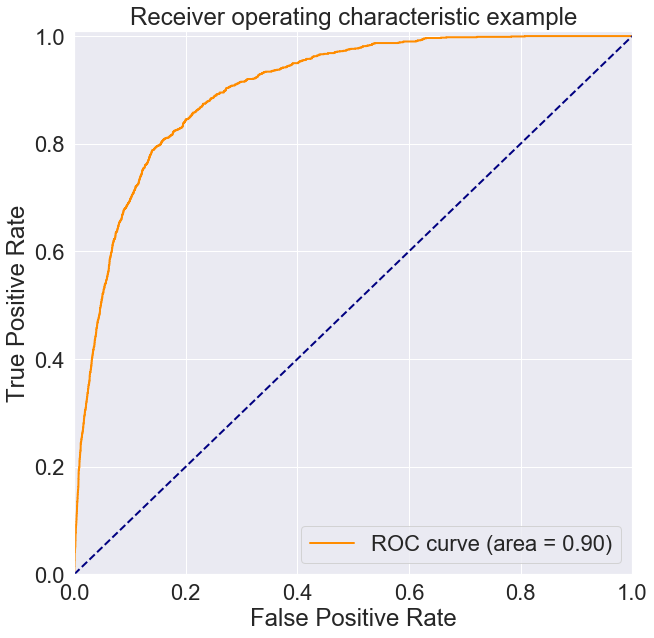

In [77]:
plt.figure(figsize=(10, 10))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.01])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [76]:
print(cross_val_score(classifier_pipeline, X_train, y_train, cv=5))

[0.90306919 0.90601699 0.9072308  0.90182134 0.90875976]


# GridSearch

In [78]:
param_grid = [
    {
        'preprocessing__num__impute': [
            SimpleImputer(missing_values=np.nan, strategy='mean'),
            SimpleImputer(missing_values=np.nan, strategy='median'),
            SimpleImputer(missing_values=np.nan, strategy='most_frequent')
        ],
        'preprocessing__num__scale': [
            MinMaxScaler(),
            MaxAbsScaler(),
            RobustScaler(),
            StandardScaler()
        ],
        'preprocessing__num__transform': [
            QuantileTransformer(output_distribution='normal'),
            PowerTransformer()
        ]
    }
]

In [81]:
grid = GridSearchCV(classifier_pipeline, cv=5, param_grid=param_grid)

In [82]:
grid.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('preprocessing', ColumnTransformer(n_jobs=None, remainder='drop', sparse_threshold=0.3,
         transformer_weights=None,
         transformers=[('num', Pipeline(memory=None,
     steps=[('impute', SimpleImputer(copy=True, fill_value=None, missing_values=nan, strategy='mean',
       verbose...enalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)))]),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'preprocessing__num__impute': [SimpleImputer(copy=True, fill_value=None, missing_values=nan, strategy='mean',
       verbose=0), SimpleImputer(copy=True, fill_value=None, missing_values=nan,
       strategy='median', verbose=0), SimpleImputer(copy=True, fill_value=None, missing_values=n...
          subsample=100000), PowerTransformer(copy=True, method='yeo-johnson', standardize=True)]}],
       pre_dispatch='2*n_jobs', refit

In [86]:
y_pred = grid.best_estimator_.predict_proba(X_test)

In [87]:
fpr, tpr, _ = roc_curve(y_test, y_pred[:, 1])

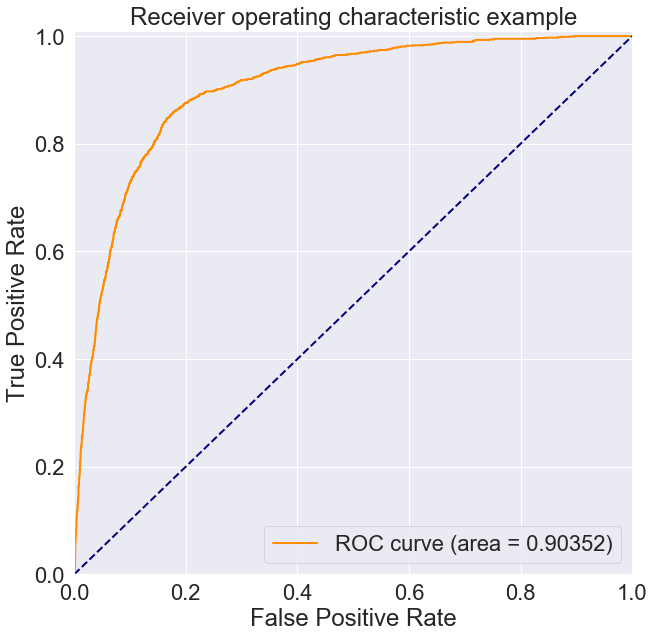

In [89]:
plt.figure(figsize=(10, 10))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.5f)' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.01])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

# Conclusion